# Proyecto:
## Análisis de velocidad del tráfico en las principales vías de Medellín

## 1. Objetivo

Utilizar los datos abiertos del Sistema Inteligente de Movilidad de Medellín (SIMM) para estimar la velocidad de un corredor en un día y hora específicos

## 2. Librerías a utilizar

- Numpy: https://numpy.org/doc/#
- Pandas: https://pandas.pydata.org/pandas-docs/stable/index.html

In [1]:
import numpy as np
import pandas as pd

## 3. Fuente de datos (data source)

El conjunto de datos a utilizar se encuentra en la página http://medata.gov.co/dataset/velocidad-y-tiempo-de-viaje-gt

In [2]:
data = pd.read_csv('velocidad_y_tiempo_de_viaje_gt.csv', delimiter=';')

C:\Users\shern\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 4. Exploración del conjunto de datos (dataset)

## 4.1 Propiedades generales

**Tamaño**

In [3]:
data.shape

(622112, 20)

**Columnas del dataset**

In [4]:
data.dtypes

id                  object
fecha_hora          object
tv_s                 int64
corredor             int64
dia                  int64
mes                  int64
ano                  int64
hora                 int64
fecha               object
nombre_corredor     object
flujo_tipo          object
sentido             object
inicio              object
fin                 object
longitud_km        float64
tv_minutos         float64
velocidad_km_h     float64
tv_min_km          float64
dia_sem            float64
nombre_dia          object
dtype: object

In [5]:
data.sample(10)

,id,fecha_hora,tv_s,corredor,dia,mes,ano,hora,fecha,nombre_corredor,flujo_tipo,sentido,inicio,fin,longitud_km,tv_minutos,velocidad_km_h,tv_min_km,dia_sem,nombre_dia
84591,105617,28/08/2017 12:00,354,18,28,8,2017,12,28/08/2017,Avenida 33,Interrumpido,WE,Avenida 80,Autopista Sur,2.6,5.9,26.0,2.3,1.0,Lunes
403135,981133,29/04/2019 11:00,366,6,29,4,2019,11,29/04/2019,Autopista Norte,Continuo,SN,Punto Cero,Solla,5.3,6.1,52.0,1.2,1.0,Lunes
503289,1312402,16/10/2019 18:00,498,15,10,10,2019,18,16/10/2019,Avenida Guayabal,Interrumpido,NS,Calle 30,Calle 12Sur,4.1,8.3,29.6,2.0,3.0,Miércoles
104063,128611,29/10/2017 14:00,277,17,29,10,2017,14,29/10/2017,Avenida 33,Interrumpido,EW,Autopista Sur,Avenida 80,2.5,4.6,32.0,1.8,7.0,Domingo
264761,548446,14/09/2018 19:00,481,25,14,9,2018,19,14/09/2018,Avenida Oriental,Interrumpido,SN,San Juan,Villanueva,1.6,8.0,12.0,5.0,5.0,Viernes
109370,134880,14/11/2017 18:00,681,4,14,11,2017,18,14/11/2017,Autopista Sur,Continuo,NS,CTI,Calle 10,6.5,11.4,34.0,1.7,2.0,Martes
416478,1023286,20/05/2019 8:30,451,4,20,5,2019,8,20/05/2019,Autopista Sur,Continuo,NS,CTI,Calle 10,6.5,7.5,52.0,1.2,1.0,Lunes
288588,622483,22/10/2018 8:00,373,6,22,10,2018,8,22/10/2018,Autopista Norte,Continuo,SN,Punto Cero,Solla,5.3,6.2,51.0,1.2,1.0,Lunes
87842,109450,7/09/2017 13:00,791,7,7,9,2017,13,7/09/2017,Avenida 80,Interrumpido,NS,Calle 65,Calle 30,5.1,13.2,23.0,2.6,4.0,Jueves
31042,39717,7/04/2017 18:30,413,5,7,4,2017,18,7/04/2017,Autopista Norte,Continuo,NS,Solla,Punto Cero,5.3,6.9,46.0,1.3,5.0,Viernes


## 4.2 Corrección tipo de datos

La columna *dia_sem* está almacenada como **float64**. Se modificará la columna para ser almacenada como **int64**.

In [6]:
data['dia_sem'] = data['dia_sem'].astype('int64')
data.sample(10)

,id,fecha_hora,tv_s,corredor,dia,mes,ano,hora,fecha,nombre_corredor,flujo_tipo,sentido,inicio,fin,longitud_km,tv_minutos,velocidad_km_h,tv_min_km,dia_sem,nombre_dia
583006,1640212,1/03/2020 17:30,351,2,3,3,2020,17,1/03/2020,Avenida Regional,Continuo,SN,Tugo,San Juan,6.6,5.9,67.7,0.9,7,Domingo
578824,1627012,25/02/2020 17:30,889,14,2,2,2020,17,25/02/2020,Avenida El Poblado,Interrumpido,SN,Calle 12Sur,Calle 30,3.8,14.8,15.4,3.9,2,Martes
602204,1719077,5/04/2020 14:00,223,23,4,4,2020,14,5/04/2020,Avenida Ferrocarril,Interrumpido,NS,Barranquilla,San Juan,2.3,3.7,37.1,1.6,7,Domingo
531481,1414997,6/12/2019 10:30,501,12,12,12,2019,10,6/12/2019,Avenida Las Palmas,Continuo,SN,Chuscalito,Sandiego,6.0,8.4,43.1,1.4,5,Viernes
502747,1310509,15/10/2019 19:30,706,13,10,10,2019,19,15/10/2019,Avenida El Poblado,Interrumpido,NS,Calle 30,Calle 12Sur,3.8,11.8,19.4,3.1,2,Martes
498631,1296135,9/10/2019 6:00,375,2,10,10,2019,6,9/10/2019,Avenida Regional,Continuo,SN,Tugo,San Juan,6.6,6.3,63.4,0.9,3,Miércoles
166629,242245,14/03/2018 9:30,417,6,14,3,2018,9,14/03/2018,Autopista Norte,Continuo,SN,Punto Cero,Solla,5.3,7.0,46.0,1.3,3,Miércoles
176259,268662,29/03/2018 12:00,670,9,29,3,2018,12,29/03/2018,Avenida 80,Interrumpido,SN,Calle 30,Calle 65,5.1,11.2,27.0,2.2,4,Jueves
575970,1612607,21/02/2020 6:30,422,20,2,2,2020,6,21/02/2020,Calle 30,Interrumpido,EW,Industriales,Avenida 80,2.9,7.0,24.7,2.4,5,Viernes
105082,129816,1/11/2017 16:00,890,14,1,11,2017,16,1/11/2017,Avenida El Poblado,Interrumpido,SN,Calle 12Sur,Calle 30,3.8,14.8,15.0,3.9,3,Miércoles


La columna _fecha_ está almacenada como **texto**. Se modificará la columna para ser almacenada como **datetime**.

In [7]:
data['fecha_hora'] = pd.to_datetime(data['fecha_hora'])
data['fecha_hora']

0        2017-01-02 06:00:00
1        2017-01-02 06:00:00
2        2017-01-02 06:00:00
3        2017-01-02 06:00:00
4        2017-01-02 06:00:00
                 ...        
622107   2020-06-15 20:00:00
622108   2020-06-15 20:00:00
622109   2020-06-15 20:00:00
622110   2020-06-15 20:00:00
622111   2020-06-15 20:00:00
Name: fecha_hora, Length: 622112, dtype: datetime64[ns]

## 4.3 Valores únicos y rangos de fecha/hora

**Corredores**

In [8]:
data['nombre_corredor'].unique()

array(['Avenida Regional', 'Autopista Sur', 'Autopista Norte',
       'Avenida 80', 'Avenida Las Palmas', 'Avenida El Poblado',
       'Avenida Guayabal', 'Avenida 33', 'Calle 30', 'Avenida San Juan',
       'Avenida Ferrocarril', 'Avenida Oriental'], dtype=object)

**Días**

In [9]:
data['nombre_dia'].unique()

array(['Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Lunes', 'Martes',
       'Domingo', 'jueves', 'martes'], dtype=object)

**Sentidos**

In [10]:
data['sentido'].unique()

array(['sn', 'NS', 'SN', 'EW', 'WE'], dtype=object)

**Rango de fechas**

In [11]:
data['fecha_hora'].min()

Timestamp('2017-01-02 06:00:00')

In [12]:
data['fecha_hora'].max()

Timestamp('2020-12-06 20:00:00')

**Rango de horas**

In [13]:
data['hora'].min()

6

In [14]:
data['hora'].max()

20

## 4.4 Corrección valores únicos

Como se observó en la sección anterior, la columna *nombre_dia* tiene dos valores con errores tipográficos: **martes** en vez de **Martes**, y **jueves** en vez de **Jueves**. Se unifican los valores a los 7 días de la semana con la primera letra en mayúscula.

In [15]:
data = data.replace('martes', 'Martes').replace('jueves', 'Jueves')
data['nombre_dia'].unique()

array(['Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Lunes', 'Martes',
       'Domingo'], dtype=object)

Como se observó en la sección anterior, la columna *sentido* tiene un valor con errores tipográficos: **sn** en vez de **SN**. Se unifican los valores a los 4 sentidos: SN, NS, EW, WE.

In [16]:
data = data.replace('sn', 'SN')
data['sentido'].unique()

array(['SN', 'NS', 'EW', 'WE'], dtype=object)

## 5. Selección de columnas clave

In [17]:
data = data[['fecha', 'hora', 'nombre_corredor', 'sentido', 'inicio', 'fin', 'velocidad_km_h', 'dia_sem', 'nombre_dia']]
data.head()

,fecha,hora,nombre_corredor,sentido,inicio,fin,velocidad_km_h,dia_sem,nombre_dia
0,1/02/2017,6,Avenida Regional,SN,Tugo,San Juan,63.0,3,Miércoles
1,1/02/2017,6,Autopista Sur,NS,CTI,Calle 10,47.0,3,Miércoles
2,1/02/2017,6,Autopista Norte,NS,Solla,Punto Cero,39.0,3,Miércoles
3,1/02/2017,6,Autopista Norte,SN,Punto Cero,Solla,48.0,3,Miércoles
4,1/02/2017,6,Avenida 80,NS,Calle 65,Calle 30,26.0,3,Miércoles


## 6. Cálculo de promedios de velocidad por corredor, por sentido, por día, por hora

In [18]:
data.groupby(['nombre_corredor', 'sentido', 'inicio', 'fin', 'dia_sem', 'nombre_dia', 'fecha', 'hora']).mean()

velocidad_km_h
nombre_corredor sentido inicio     fin          dia_sem nombre_dia fecha     hora                
Autopista Norte NS      Solla      Punto Cero   1       Lunes      1/01/2018 6               55.0
                                                                             7               55.0
                                                                             8               58.0
                                                                             9               57.0
                                                                             10              58.0
...                                                                                           ...
Calle 30        WE      Avenida 80 Industriales 7       Domingo    9/12/2018 16              25.0
                                                                             17              25.5
                                                                             18              25.5
                                                                             19              24.5
                                                                             20              25.0

[354098 rows x 1 columns]

In [19]:
pt = pd.pivot_table(data, values='velocidad_km_h', index=['nombre_corredor', 'dia_sem', 'hora'], 
               columns=['sentido'], aggfunc=np.mean, fill_value=0)
pt

sentido                              EW         NS         SN         WE
nombre_corredor dia_sem hora                                            
Autopista Norte 1       6      0.000000  36.953695  47.747291   0.000000
                        7      0.000000  39.076347  50.287126   0.000000
                        8      0.000000  46.883562  50.458904   0.000000
                        9      0.000000  44.270034  48.671959   0.000000
                        10     0.000000  48.760473  48.329054   0.000000
...                                 ...        ...        ...        ...
Calle 30        7       16    26.314229   0.000000   0.000000  25.069565
                        17    26.279200   0.000000   0.000000  24.976800
                        18    25.551394   0.000000   0.000000  24.960956
                        19    25.480400   0.000000   0.000000  25.296414
                        20    26.672112   0.000000   0.000000  25.539044

[1260 rows x 4 columns]

## 7. Gráficos

## 7.1 Variación de la velocidad por corredor, por día, por hora

In [20]:
def plot_corredor(corredor):
    pd.pivot_table(data[(data['nombre_corredor'] == corredor)],
               values='velocidad_km_h', index=['dia_sem', 'hora'], 
               columns=['sentido'], aggfunc=np.mean, fill_value=0).plot.line(subplots=False)

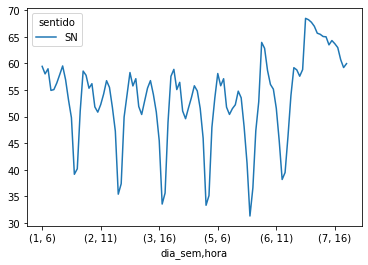

In [21]:
plot_corredor('Avenida Regional')

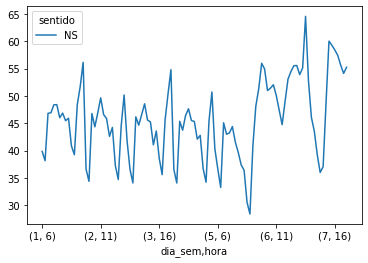

In [22]:
plot_corredor('Autopista Sur')

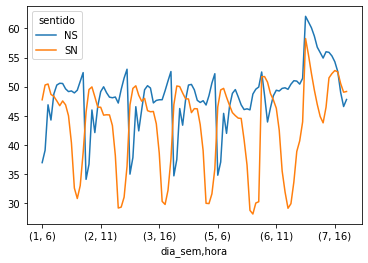

In [23]:
plot_corredor('Autopista Norte')

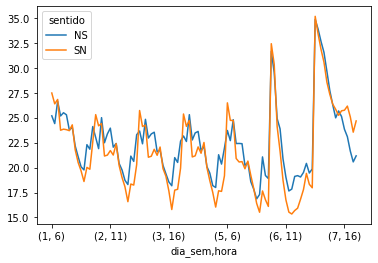

In [24]:
plot_corredor('Avenida 80')

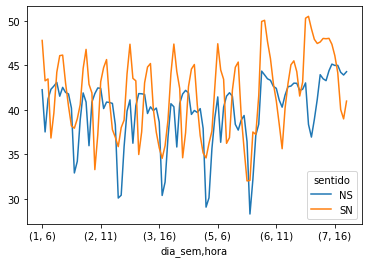

In [25]:
plot_corredor('Avenida Las Palmas')

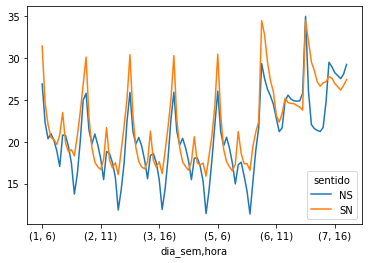

In [26]:
plot_corredor('Avenida El Poblado')

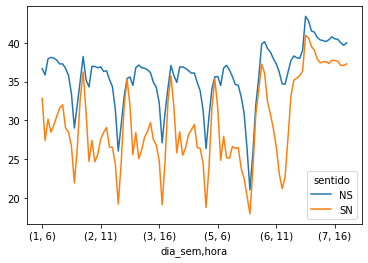

In [27]:
plot_corredor('Avenida Guayabal')

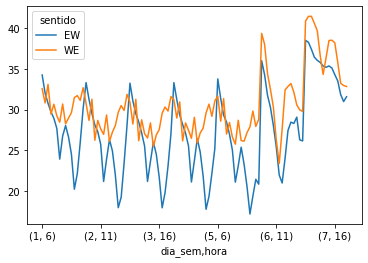

In [28]:
plot_corredor('Avenida 33')

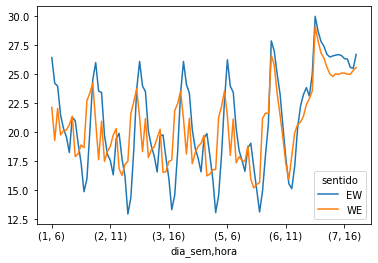

In [29]:
plot_corredor('Calle 30')

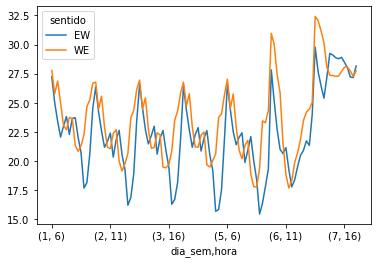

In [30]:
plot_corredor('Avenida San Juan')

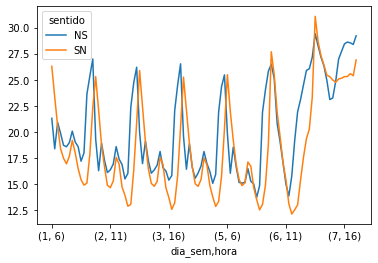

In [31]:
plot_corredor('Avenida Ferrocarril')

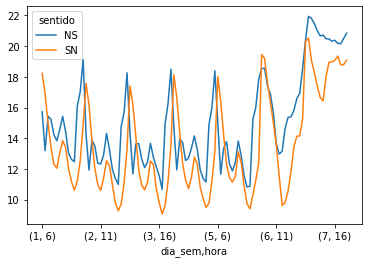

In [32]:
plot_corredor('Avenida Oriental')